In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.chdir( "/content/gdrive/MyDrive/flair" ) 

In [ ]:
pip install flair

     |████████████████████████████████| 286kB 28.4MB/s 
     |████████████████████████████████| 19.7MB 1.2MB/s 
     |████████████████████████████████| 1.2MB 52.6MB/s 
     |████████████████████████████████| 983kB 44.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 798kB 25.1MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 71kB 11.9MB/s 
     |████████████████████████████████| 2.3MB 38.5MB/s 
     |████████████████████████████████| 3.3MB 39.6MB/s 
     |████████████████████████████████| 901kB 48.1MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=5656acc7165a049f0dd90a43d8f3e62a859cc58860f2a31efbf3add112c520ef
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for segtok: filena

In [ ]:
from flair.data import Corpus
from flair.data_fetcher import NLPTaskDataFetcher

downsample = 1.0 # 1.0 is full data, try a much smaller number like 0.01 to test run the code
data_folder = os.getcwd()
columns = {0: 'text', 1: 'ner'}

# 1. get the corpus
corpus: Corpus = NLPTaskDataFetcher.load_column_corpus(data_folder, columns,
                                                             train_file='training_data.csv',
                                                             test_file='test_data.csv',
                                                           dev_file=None).downsample(downsample)
print(corpus)

tag_dictionary = corpus.make_tag_dictionary(tag_type='ner')

2021-05-28 14:11:51,514 Reading data from /content/gdrive/My Drive/flair
2021-05-28 14:11:51,517 Train: /content/gdrive/My Drive/flair/training_data.csv
2021-05-28 14:11:51,520 Dev: None
2021-05-28 14:11:51,522 Test: /content/gdrive/My Drive/flair/test_data.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated function (or staticmethod) load_column_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  if sys.path[0] == '':


Corpus: 7975 train + 886 dev + 3032 test sentences


Now, we have loaded __flair__ and our data.<br>
Next, we train models for __NER__.<br>
Inform yourselves on [Embeddings](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md) in Flair.<br>
__Question 1__: What happens when we stack embeddings?<br>
How does this influence computational running time and accuracy?<br>
What does the __hidden_size__ of the __SequenceTagger__ reference?<br>
What happens when you increase/decrease the __hidden_size__?<br>
__Answer 1__: Stacking embeddings means that we combine different embeddings to get better results (better accuracy) with the drawback of having greater computational runtime. The __hidden_size__ of the __SequenceTagger__ references the number of hidden states in the RNN.

In [ ]:
# 4. initialize embeddings. Experiment with different embedding types to see what gets the best results
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings,FlairEmbeddings, CharacterEmbeddings

embedding_types = [
    WordEmbeddings('glove'),
    # comment in this line to use character embeddings
    CharacterEmbeddings(),

    # comment in these lines to use flair embeddings (needs a LONG time to train :-)
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type='ner',
                                        use_crf=True)

Start Training

In [ ]:
# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

model_name = 'flair_glove_fw_bw'

trainer.train(model_name,
              learning_rate=0.1,
              mini_batch_size=10,
              #anneal_with_restarts=True,
              max_epochs=5)

2021-05-28 14:12:31,466 ----------------------------------------------------------------------------------------------------
2021-05-28 14:12:31,470 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
    (list_embedding_1): CharacterEmbeddings(
      (char_embedding): Embedding(275, 25)
      (char_rnn): LSTM(25, 25, bidirectional=True)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dro

2021-05-23 18:14:57,079 ----------------------------------------------------------------------------------------------------
2021-05-23 18:14:57,081 WARNING: No LOSS found for test split in this data.
2021-05-23 18:14:57,083 Are you sure you want to plot LOSS and not another value?
2021-05-23 18:14:57,085 ----------------------------------------------------------------------------------------------------
2021-05-23 18:14:57,111 ----------------------------------------------------------------------------------------------------
2021-05-23 18:14:57,112 WARNING: No F1 found for test split in this data.
2021-05-23 18:14:57,113 Are you sure you want to plot F1 and not another value?
2021-05-23 18:14:57,114 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /content/gdrive/My Drive/flair/flair_glove_fw_bw/training.png


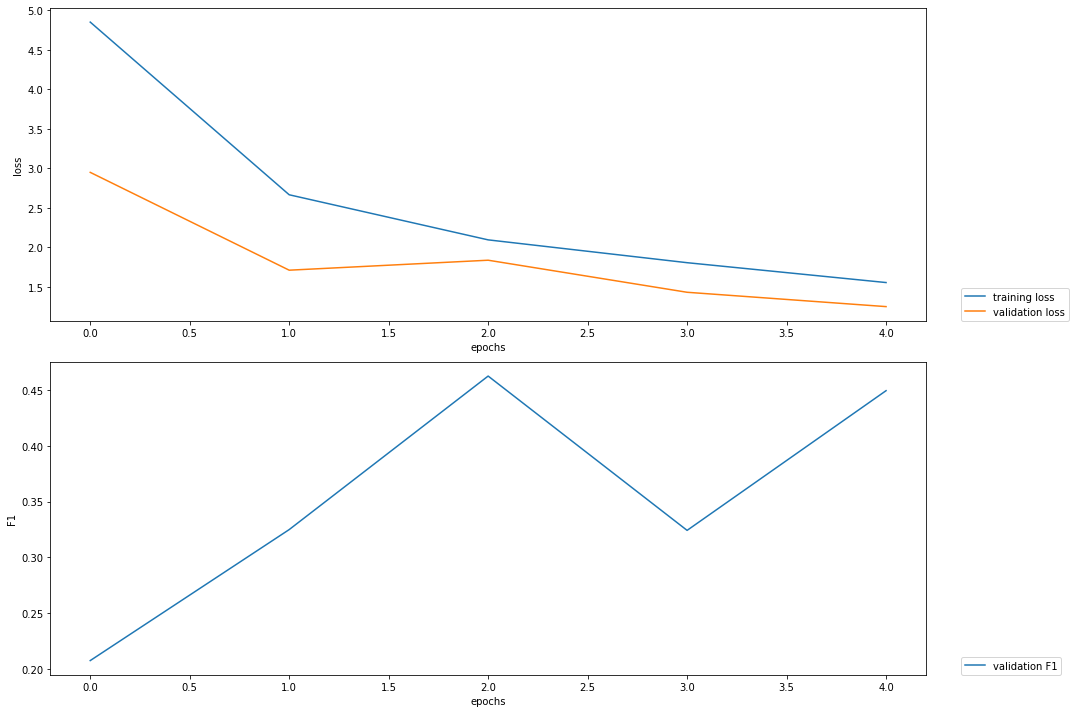

In [ ]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves( os.getcwd() + '/flair_glove_fw_bw/loss.tsv')

__Question 2__: Suggest, how could you improve the F1-value?<br>
Are 5 epochs enough for training?<br>
How could you speed up computation?<br>
__Answer 2__: